# Regularization Lab

In this lab we'll practice regularization. The [data set](http://data.princeton.edu/wws509/datasets/#salary) consists of salary data for 52 professors at a small college, categorized by gender, professor rank, highest degree, and years of service paired with salary.

### Learning objectives

- Practice working with categorical data and dummy variables
- Try to predict various features using the others
- Practice regularization and evaluating model fit
- Visualize your fits, plotting accuracies versus predictions

### Requirements

The data contains three categorical variables, each with two or three values: "sx", "dg", "rk". Your tasks are as follows.
* Create dummy variables for each categorical variables.
* Use pandas `value_counts()` to see the distributions of the data
* Use seaborn to make [violin plots](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.violinplot.html) of the salaries by variable

For each categorical variable:
* Fit a model to the entire data set without the dummy variables for that category (but include the others).
* Use pandas to select a subset of the data and fit a linear model to just that subset. For example, select just the male professors and fit a model
* Apply the model fit from one subset to the other subset and compare the goodness of fit scores.
* Do the same for the other variables, i.e. fit a model to the women professors and apply it to the men, again comparing the goodness of fit.
* Use regularization (e.g. RidgeRegression or Lasso) to fit a model on one subset and apply to the other, again looking at the goodness of fit. Did regularization improve the model fits?

Bonus exercises:
* Try to predict years served "yr" or years since degree "yd" from the salary data and other variables. Does regularization help in any of these cases?

### Resources
- [scikit-learn linear models](http://scikit-learn.org/stable/modules/linear_model.html), including regularization
- [http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html](Creating dummy variables with pandas)


In [1]:
% matplotlib inline

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import r2_score

In [2]:
# Load the data

df = pd.read_csv("data/salary.dat", delim_whitespace=True)
df.sort_values(by="sl", inplace=True)
df.head()

,sx,rk,yr,dg,yd,sl
50,female,assistant,1,doctorate,1,15000
47,female,assistant,2,doctorate,2,15350
45,male,assistant,2,doctorate,1,16094
46,female,assistant,2,doctorate,6,16150
48,male,assistant,1,doctorate,1,16244


In [3]:
# Apply value_counts() to series for "sx", "dg", and "rk"
print df["sx"].value_counts()
print df["dg"].value_counts()
print df["rk"].value_counts()

male      38
female    14
Name: sx, dtype: int64
doctorate    34
masters      18
Name: dg, dtype: int64
full         20
assistant    18
associate    14
Name: rk, dtype: int64


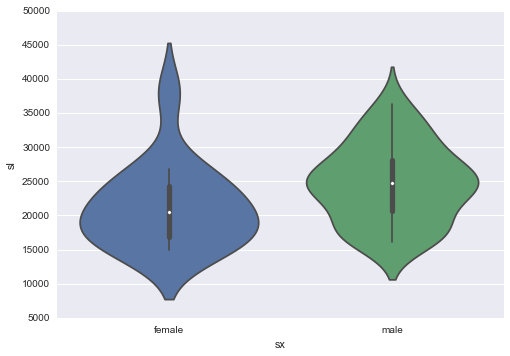

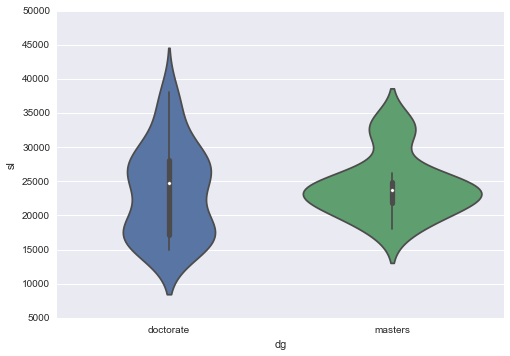

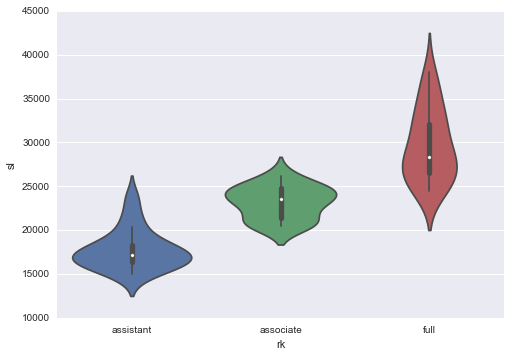

In [4]:
# Make violin plots
sns.violinplot(x="sx", y="sl", data=df)
plt.show()

sns.violinplot(x="dg", y="sl", data=df)
plt.show()

sns.violinplot(x="rk", y="sl", data=df)
plt.show()

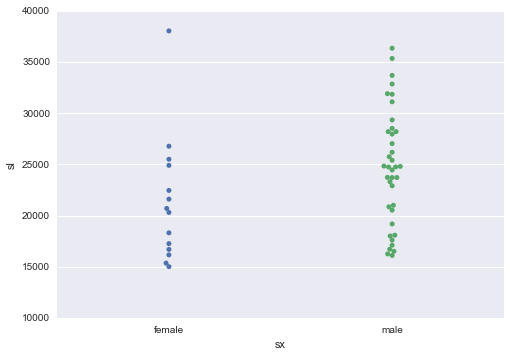

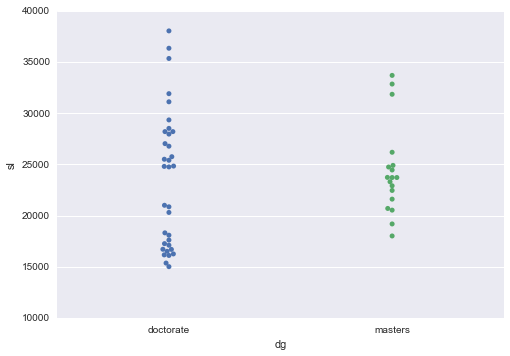

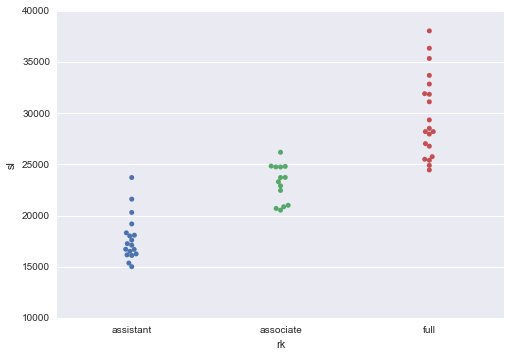

In [11]:
# Make violin plots
sns.swarmplot(x="sx", y="sl", data=df)
plt.show()

sns.swarmplot(x="dg", y="sl", data=df)
plt.show()

sns.swarmplot(x="rk", y="sl", data=df)
plt.show()

In [5]:
## Students can copy their code from Week 2, Lesson 3.3
# Create dummy variables

categories = ["sx", "rk", "dg"]
for category in categories:
    series = df[category]
    dummies = pd.get_dummies(series, prefix=category)
    df = pd.concat([df, dummies], axis=1)
print df.columns
df.head()

Index([u'sx', u'rk', u'yr', u'dg', u'yd', u'sl', u'sx_female', u'sx_male',
       u'rk_assistant', u'rk_associate', u'rk_full', u'dg_doctorate',
       u'dg_masters'],
      dtype='object')


,sx,rk,yr,dg,yd,sl,sx_female,sx_male,rk_assistant,rk_associate,rk_full,dg_doctorate,dg_masters
50,female,assistant,1,doctorate,1,15000,1.0,0.0,1.0,0.0,0.0,1.0,0.0
47,female,assistant,2,doctorate,2,15350,1.0,0.0,1.0,0.0,0.0,1.0,0.0
45,male,assistant,2,doctorate,1,16094,0.0,1.0,1.0,0.0,0.0,1.0,0.0
46,female,assistant,2,doctorate,6,16150,1.0,0.0,1.0,0.0,0.0,1.0,0.0
48,male,assistant,1,doctorate,1,16244,0.0,1.0,1.0,0.0,0.0,1.0,0.0


### Here's an example to get you started.

Try reruning the next cell multiple times. You should see an improvement in the fit on the full data set for some samples.

In [6]:
# Here's an example to get you started. Let's fit a model on a small random subset

subset = df.sample(frac=0.1, replace=False)

X = subset[[u'yr', u'yd']]
y = subset[u'sl']

lm = linear_model.LinearRegression()
model = lm.fit(X, y)
predictions = lm.predict(X)
print "Sample:", lm.score(X, y)

# Apply to the whole data set

X = df[[u'yr', u'yd']]
y = df[u'sl']
print "All data with sample model:", lm.score(X, y)

# Repeat with regularization

X = subset[[u'yr', u'yd']]
y = subset[u'sl']

lm = linear_model.RidgeCV(alphas=[0.1, 1, 10]) # Try different alphas
model = lm.fit(X, y)
predictions = lm.predict(X)
print "Sample with regularization:", lm.score(X, y)

# Apply to the whole data set

X = df[[u'yr', u'yd']]
y = df[u'sl']
print "All data with regularization model:", lm.score(X, y)

# Did the results improve?

Sample: 0.82177808568
All data with sample model: 0.414809630551
Sample with regularization: 0.821777164867
All data with regularization model: 0.415691128983


### Begin your exercises below

0.88630543814


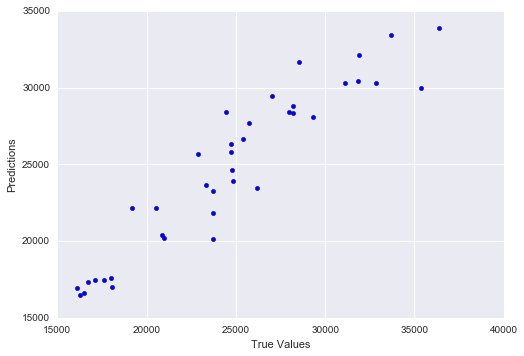

0.69448811957


In [7]:
# Fit a model to the men
mask = df["sx"] == "male"
X = df[mask][[u'yr', u'yd',
       u'rk_assistant', u'rk_associate', u'rk_full', u'dg_doctorate',
       u'dg_masters']]
y = df[mask][u'sl']

lm = linear_model.LinearRegression()
model = lm.fit(X, y)
predictions = lm.predict(X)
print lm.score(X, y)

plt.scatter(y, predictions)
plt.ylabel("Predictions")
plt.xlabel("True Values")
plt.show()

# Apply to women
mask = df["sx"] == "female"
X = df[mask][[u'yr', u'yd',
       u'rk_assistant', u'rk_associate', u'rk_full', u'dg_doctorate',
       u'dg_masters']]
y = df[mask][u'sl']
print lm.score(X, y)

0.781837240731


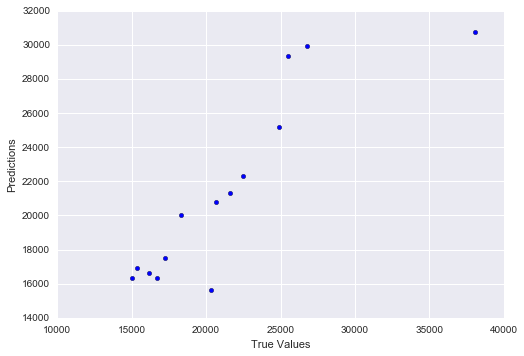

0.657523429275


In [8]:
# What about the other order? Apply to women first
mask = df["sx"] == "female"
X = df[mask][[u'yr', u'yd',
       u'rk_assistant', u'rk_associate', u'rk_full', u'dg_doctorate',
       u'dg_masters']]
y = df[mask][u'sl']

lm = linear_model.LinearRegression()
model = lm.fit(X, y)
predictions = lm.predict(X)
print lm.score(X, y)

plt.scatter(y, predictions)
plt.ylabel("Predictions")
plt.xlabel("True Values")
plt.show()

# Apply to men
mask = df["sx"] == "male"
X = df[mask][[u'yr', u'yd',
       u'rk_assistant', u'rk_associate', u'rk_full', u'dg_doctorate',
       u'dg_masters']]
y = df[mask][u'sl']
print lm.score(X, y)

alpha: 0.7
0.763926247352


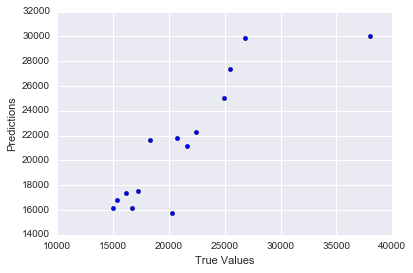

0.728008690801


In [130]:
# This time use regularlization

# What about the other order? Apply to women first
mask = df["sx"] == "female"
X = df[mask][[u'yr', u'yd',
       u'rk_assistant', u'rk_associate', u'rk_full', u'dg_doctorate',
       u'dg_masters']]
y = df[mask][u'sl']

lm = linear_model.RidgeCV(alphas=np.arange(0.1, 10, 0.1))
model = lm.fit(X, y)
predictions = lm.predict(X)
print "alpha:", lm.alpha_
print lm.score(X, y)

plt.scatter(y, predictions)
plt.ylabel("Predictions")
plt.xlabel("True Values")
plt.show()

# Apply to men
mask = df["sx"] == "male"
X = df[mask][[u'yr', u'yd',
       u'rk_assistant', u'rk_associate', u'rk_full', u'dg_doctorate',
       u'dg_masters']]
y = df[mask][u'sl']
print lm.score(X, y)

### Results
With regularization, we got a better fit on the second data set.

Now let's move on to the next category, "dg" (degree).

0.876486548837


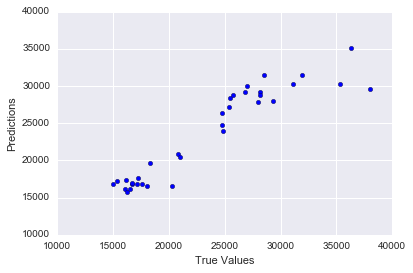

0.6849888843


In [102]:
mask = (df["dg"] == "doctorate")

X = df[mask][[u'yr', u'yd', u'sx_female', u'sx_male', u'rk_assistant',
              u'rk_associate', u'rk_full']]
y = df[mask][u'sl']

lm = linear_model.LinearRegression()
model = lm.fit(X, y)
predictions = lm.predict(X)
print lm.score(X, y)

plt.scatter(y, predictions)
plt.ylabel("Predictions")
plt.xlabel("True Values")
plt.show()

mask = (df["dg"] != "doctorate")
X = df[mask][[u'yr', u'yd', u'sx_female', u'sx_male', u'rk_assistant',
              u'rk_associate', u'rk_full']]
y = df[mask][u'sl']
print lm.score(X, y)

0.797682614586


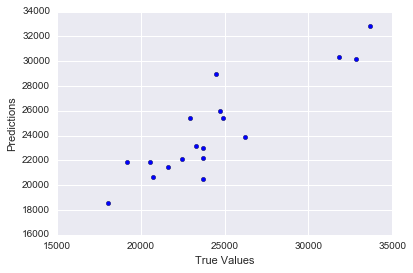

0.745050571834


In [103]:
# Change the order

mask = (df["dg"] != "doctorate") # !=

X = df[mask][[u'yr', u'yd', u'sx_female', u'sx_male', u'rk_assistant',
              u'rk_associate', u'rk_full']]
y = df[mask][u'sl']

lm = linear_model.LinearRegression()
model = lm.fit(X, y)
predictions = lm.predict(X)
print lm.score(X, y)

plt.scatter(y, predictions)
plt.ylabel("Predictions")
plt.xlabel("True Values")
plt.show()

mask = (df["dg"] == "doctorate") # ==
X = df[mask][[u'yr', u'yd', u'sx_female', u'sx_male', u'rk_assistant',
              u'rk_associate', u'rk_full']]
y = df[mask][u'sl']
print lm.score(X, y)

alpha: 1.0
0.763135476913


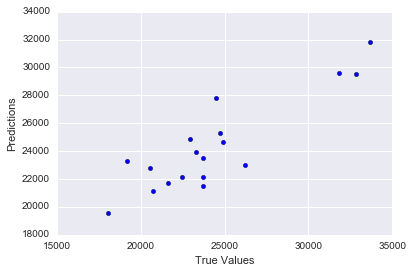

0.76942062736


In [104]:
# With regularization

mask = (df["dg"] != "doctorate") # !=

X = df[mask][[u'yr', u'yd', u'sx_female', u'sx_male', u'rk_assistant',
              u'rk_associate', u'rk_full']]
y = df[mask][u'sl']

lm = linear_model.RidgeCV(alphas=np.arange(1, 2, 0.1))
model = lm.fit(X, y)
predictions = lm.predict(X)
print "alpha:", lm.alpha_
print lm.score(X, y)

plt.scatter(y, predictions)
plt.ylabel("Predictions")
plt.xlabel("True Values")
plt.show()

mask = (df["dg"] == "doctorate") # ==
X = df[mask][[u'yr', u'yd', u'sx_female', u'sx_male', u'rk_assistant',
              u'rk_associate', u'rk_full']]
y = df[mask][u'sl']
print lm.score(X, y)

### Results
That time we only got a small gain from regularization. Note by varying alpha we can shift the goodness of fit.

Next we move on to "rk" (professor rank). In this case there are three options.

full: 0.518546885368


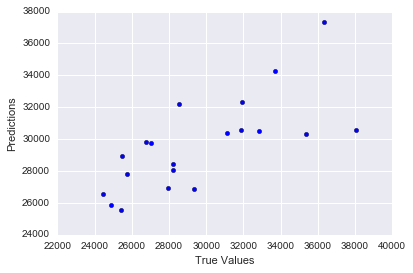

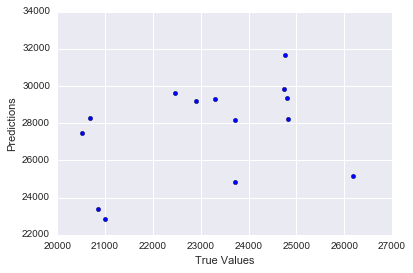

associate: -7.45265423236


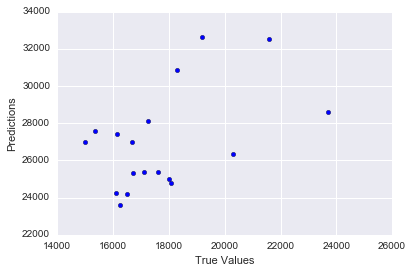

assistant: -18.353149193


In [105]:
from sklearn.metrics import r2_score

mask = (df["rk"] == "full")

X = df[mask][[u'yr', u'yd', u'sx_female', u'sx_male',
              u'dg_doctorate', u'dg_masters']]
y = df[mask][u'sl']

lm = linear_model.LinearRegression()

model = lm.fit(X, y)
predictions = lm.predict(X)
print "full:", r2_score(y, predictions)

predictions = lm.predict(X)
plt.scatter(y, predictions)
plt.ylabel("Predictions")
plt.xlabel("True Values")
plt.show()

mask = (df["rk"] == "associate")
X = df[mask][[u'yr', u'yd', u'sx_female', u'sx_male',
              u'dg_doctorate', u'dg_masters']]
y = df[mask][u'sl']

predictions = lm.predict(X)
plt.scatter(y, predictions)
plt.ylabel("Predictions")
plt.xlabel("True Values")
plt.show()

print "associate:", r2_score(y, predictions)

mask = (df["rk"] == "assistant")
X = df[mask][[u'yr', u'yd', u'sx_female', u'sx_male',
              u'dg_doctorate', u'dg_masters']]
y = df[mask][u'sl']

predictions = lm.predict(X)
plt.scatter(y, predictions)
plt.ylabel("Predictions")
plt.xlabel("True Values")
plt.show()

print "assistant:", r2_score(y, predictions)

In [106]:
mask = (df["rk"] == "associate")

X = df[mask][[u'yr', u'yd', u'sx_female', u'sx_male',
              u'dg_doctorate', u'dg_masters']]
y = df[mask][u'sl']

lm = linear_model.LinearRegression()

model = lm.fit(X, y)
predictions = lm.predict(X)
print "associate:", r2_score(y, predictions)

mask = (df["rk"] == "full")
X = df[mask][[u'yr', u'yd', u'sx_female', u'sx_male',
              u'dg_doctorate', u'dg_masters']]
y = df[mask][u'sl']

predictions = lm.predict(X)
print "full:", r2_score(y, predictions)

mask = (df["rk"] == "assistant")
X = df[mask][[u'yr', u'yd', u'sx_female', u'sx_male',
              u'dg_doctorate', u'dg_masters']]
y = df[mask][u'sl']

predictions = lm.predict(X)
print "assistant:", r2_score(y, predictions)

associate: 0.621136292896
full: -2.60749883815
assistant: -7.96517263065


In [107]:
mask = (df["rk"] == "assistant")

X = df[mask][[u'yr', u'yd', u'sx_female', u'sx_male',
              u'dg_doctorate', u'dg_masters']]
y = df[mask][u'sl']

lm = linear_model.LinearRegression()

model = lm.fit(X, y)
predictions = lm.predict(X)
print "assistant:", r2_score(y, predictions)

predictions = lm.predict(X)

mask = (df["rk"] == "full")
X = df[mask][[u'yr', u'yd', u'sx_female', u'sx_male',
              u'dg_doctorate', u'dg_masters']]
y = df[mask][u'sl']

predictions = lm.predict(X)
print "full:", r2_score(y, predictions)

mask = (df["rk"] == "associate")
X = df[mask][[u'yr', u'yd', u'sx_female', u'sx_male',
              u'dg_doctorate', u'dg_masters']]
y = df[mask][u'sl']

predictions = lm.predict(X)
print "associate:", r2_score(y, predictions)

assistant: 0.515603387509
full: -8.39910384198
associate: -5.80743845944


# Results
As you can see, fitting a model on any of the subsets does not produce  good model for the others. In this case regularization won't help much.

### Bonus

Regularization does make a difference when predicting "yd" split on "sx". Can your students find others?

0.926177658276


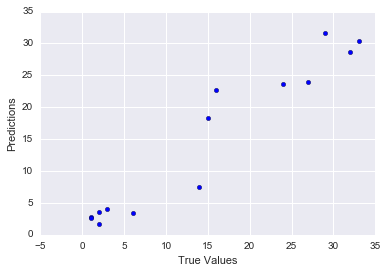

0.0479508851501


In [123]:
mask = df["sx"] == "female"
X = df[mask][[u'sl', u'yr',
       u'rk_assistant', u'rk_associate', u'rk_full', u'dg_doctorate',
       u'dg_masters']]
y = df[mask][u'yd']

lm = linear_model.LinearRegression()
# lm = linear_model.RidgeCV(alphas=np.arange(0.1, 10, 0.1))
model = lm.fit(X, y)
predictions = lm.predict(X)
# print "alpha:", lm.alpha_
print lm.score(X, y)

plt.scatter(y, predictions)
plt.ylabel("Predictions")
plt.xlabel("True Values")
plt.show()

mask = df["sx"] == "male"
X = df[mask][[u'sl', u'yr',
       u'rk_assistant', u'rk_associate', u'rk_full', u'dg_doctorate',
       u'dg_masters']]
y = df[mask][u'yd']
print lm.score(X, y)

alpha: 0.5
0.918387308136


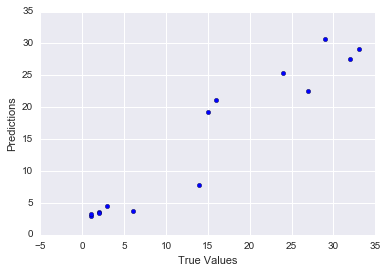

0.167545627944


In [126]:
mask = df["sx"] == "female"
X = df[mask][[u'sl', u'yr',
       u'rk_assistant', u'rk_associate', u'rk_full', u'dg_doctorate',
       u'dg_masters']]
y = df[mask][u'yd']

# lm = linear_model.LinearRegression()
lm = linear_model.RidgeCV(alphas=np.arange(0.1, 10, 0.1))
model = lm.fit(X, y)
predictions = lm.predict(X)
print "alpha:", lm.alpha_
print lm.score(X, y)

plt.scatter(y, predictions)
plt.ylabel("Predictions")
plt.xlabel("True Values")
plt.show()

mask = df["sx"] == "male"
X = df[mask][[u'sl', u'yr',
       u'rk_assistant', u'rk_associate', u'rk_full', u'dg_doctorate',
       u'dg_masters']]
y = df[mask][u'yd']
print lm.score(X, y)

alpha: 0.3
0.918931384594


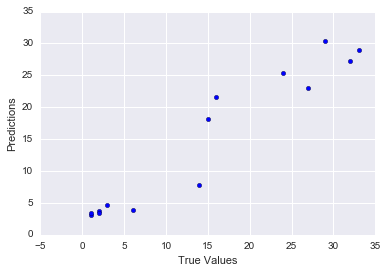

0.157379378495


In [128]:
mask = df["sx"] == "female"
X = df[mask][[u'sl', u'yr',
       u'rk_assistant', u'rk_associate', u'rk_full', u'dg_doctorate',
       u'dg_masters']]
y = df[mask][u'yd']

# lm = linear_model.LinearRegression()
lm = linear_model.LassoCV(alphas=np.arange(0.1, 10, 0.1))
model = lm.fit(X, y)
predictions = lm.predict(X)
print "alpha:", lm.alpha_
print lm.score(X, y)

plt.scatter(y, predictions)
plt.ylabel("Predictions")
plt.xlabel("True Values")
plt.show()

mask = df["sx"] == "male"
X = df[mask][[u'sl', u'yr',
       u'rk_assistant', u'rk_associate', u'rk_full', u'dg_doctorate',
       u'dg_masters']]
y = df[mask][u'yd']
print lm.score(X, y)

alpha: 9.9
0.462516963657


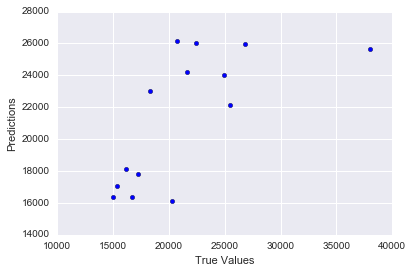

0.570804838863


In [135]:
# This time use regularlization

# What about the other order? Apply to women first
mask = df["sx"] == "female"
X = df[mask][[u'yr', u'yd']]
y = df[mask][u'sl']

# lm = linear_model.LinearRegression()
lm = linear_model.RidgeCV(alphas=np.arange(0.1, 10, 0.1))
model = lm.fit(X, y)
predictions = lm.predict(X)
print "alpha:", lm.alpha_
print lm.score(X, y)

plt.scatter(y, predictions)
plt.ylabel("Predictions")
plt.xlabel("True Values")
plt.show()

# Apply to men
mask = df["sx"] == "male"
X = df[mask][[u'yr', u'yd']]
y = df[mask][u'sl']
print lm.score(X, y)